In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = sns.load_dataset('titanic')
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
data['survived'].value_counts()

,count
survived,
0,549
1,342


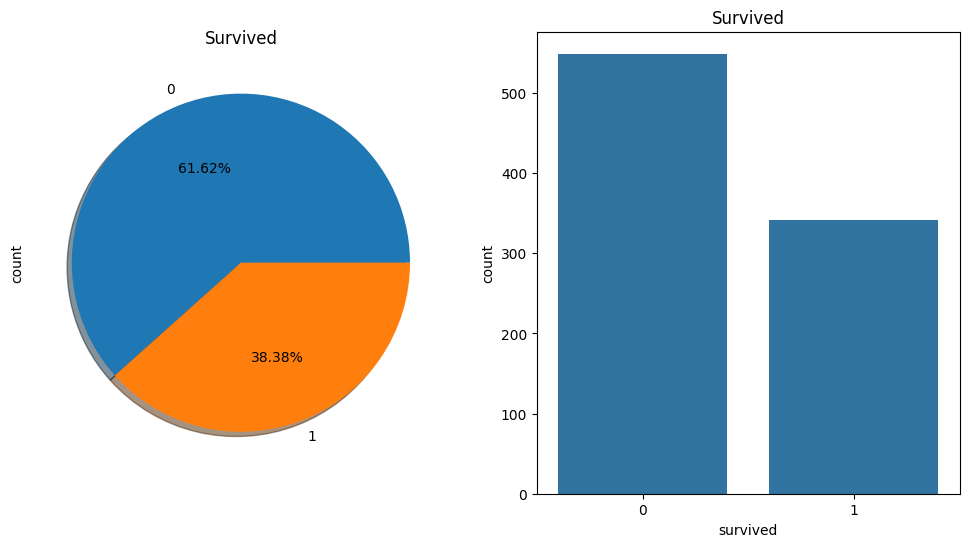

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
data['survived'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
sns.countplot(x=data['survived'], ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
data.groupby(['sex'])['survived'].count()

,survived
sex,
female,314
male,577


In [ ]:
data.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

Text(0.5, 1.0, 'Gender: Male vs Female')

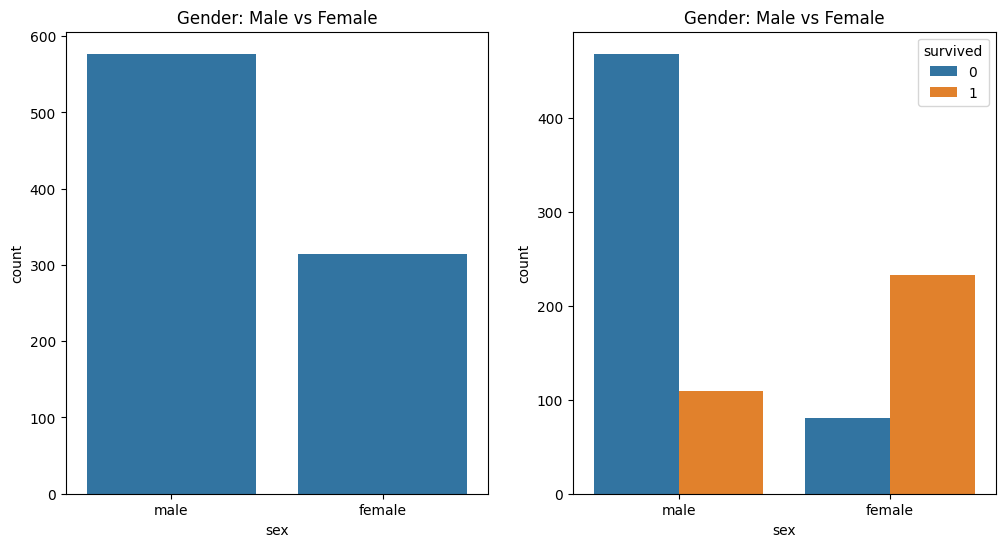

In [ ]:
fig,ax=plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='sex', data=data, ax=ax[0])
ax[0].set_title('Gender: Male vs Female')
sns.countplot(x='sex', data=data, hue='survived', ax=ax[1])
ax[1].set_title('Gender: Male vs Female')

<Axes: xlabel='survived', ylabel='age'>

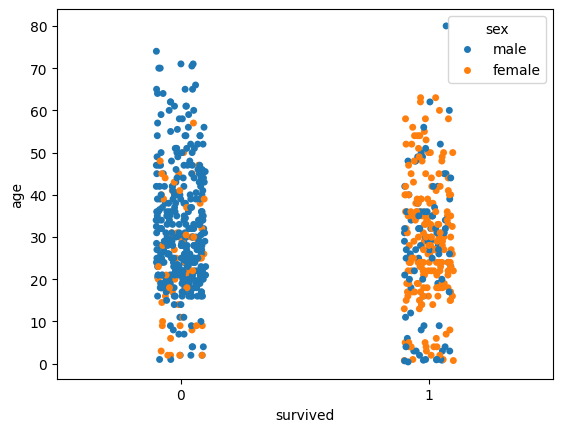

In [ ]:
sns.stripplot(y='age', x='survived',hue='sex', data=data)

<Axes: xlabel='class', ylabel='survived'>

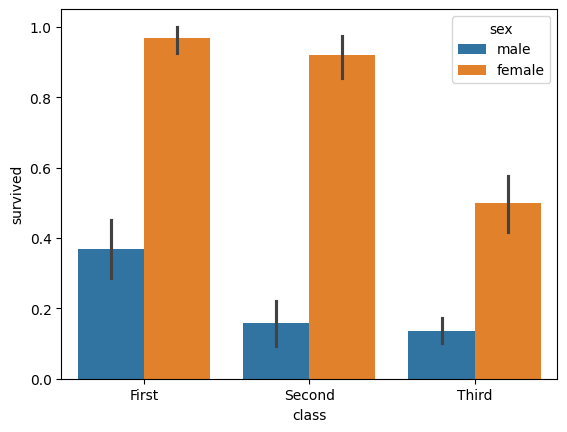

In [ ]:
sns.barplot(x="class",y="survived", hue='sex', data=data)

Text(0.5, 1.0, 'pclass: survived vs dead')

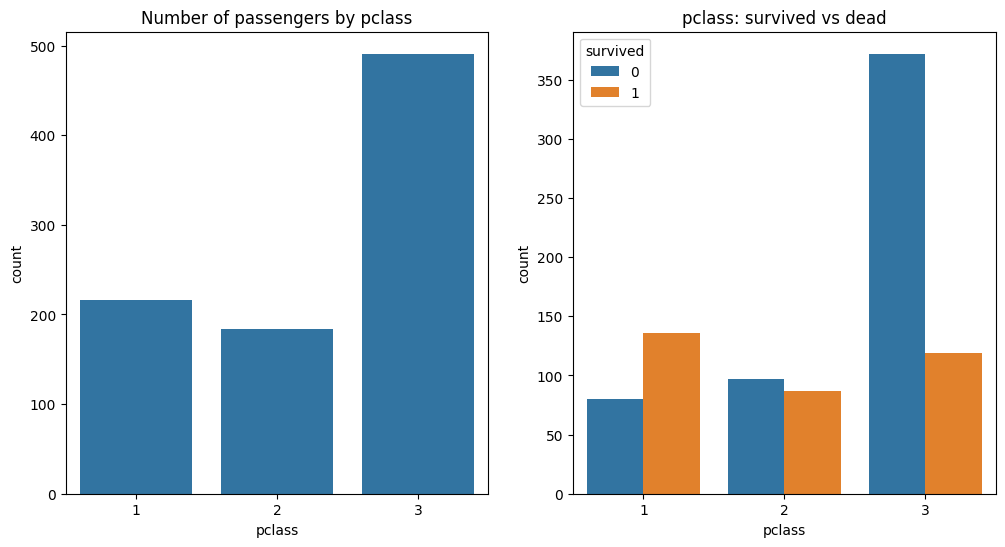

In [ ]:
fig,ax=plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='pclass', data=data, ax=ax[0])
ax[0].set_title('Number of passengers by pclass')
sns.countplot(x='pclass', data=data, hue='survived', ax=ax[1])
ax[1].set_title('pclass: survived vs dead')

In [ ]:
pd.crosstab([data.sex, data.survived], data.pclass)

pclass            1   2    3
sex    survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

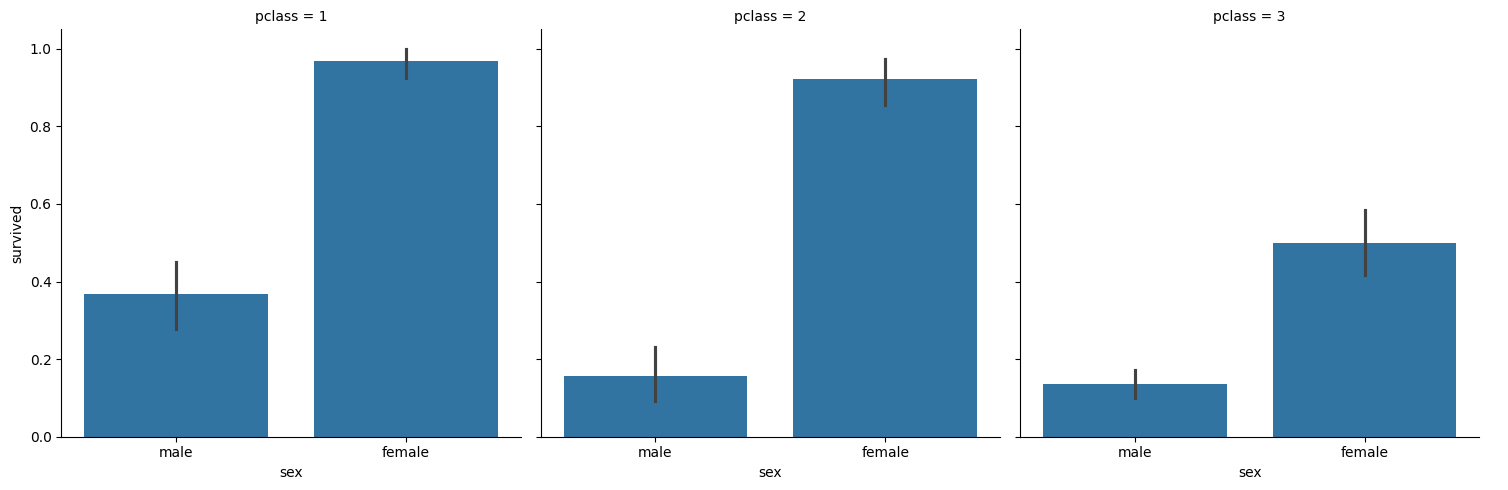

In [ ]:
sns.catplot(x='sex', y='survived', col='pclass', kind="bar", data=data)

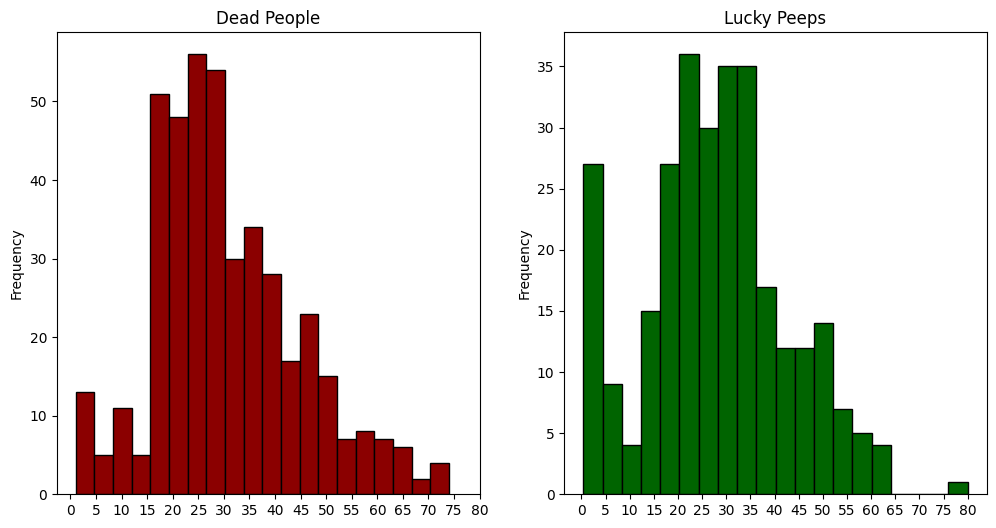

In [ ]:
fig,ax=plt.subplots(1,2, figsize=(12,6))

data[data['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='darkred')
ax[0].set_title("Dead People")
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['survived']==1].age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='darkgreen')
ax[1].set_title("Lucky Peeps")
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

In [ ]:
low = data[data.fare < 100]['survived'].sum()
medium = data[(data.fare >= 100) & (data.fare < 200)]['survived'].sum()
high = data[data.fare >= 200]['survived'].sum()

Fare_wise_survived_range=[low,medium,high]
Fare_wise_survived_range

[303, 25, 14]

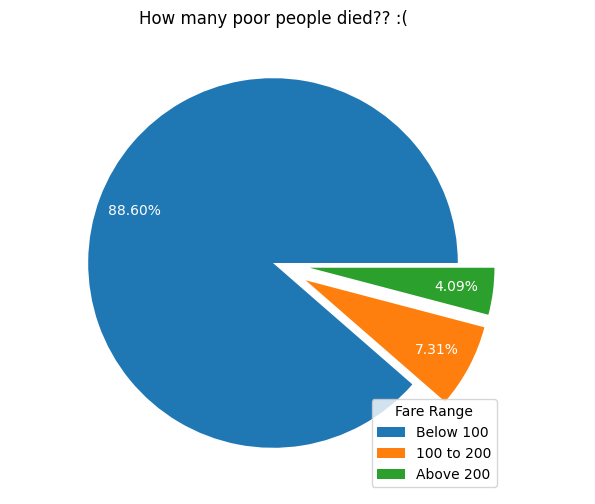

In [ ]:
plt.figure(figsize=(6,6), dpi=100)
label=['Below 100', '100 to 200', 'Above 200']

explode=[0,.2,.2]

plt.pie(Fare_wise_survived_range, labels=label, explode=explode, autopct="%.2f%%", textprops={'color':"w"},  pctdistance=0.8)

plt.title("How many poor people died?? :(")
plt.legend(title="Fare Range", loc="lower right")
plt.show()